<a href="https://colab.research.google.com/github/GabrielCaetano1/Modelo-de-previs-o-ML/blob/main/Oficina5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação das Bibliotecas:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Criação do Dataset:

In [10]:
np.random.seed(42)
n_samples = 100
data = {
    'area_lote': np.random.randint(1000, 10000, n_samples),
    'ano_contrucao': np.random.randint(1950, 2024, n_samples),
    'area_primeiro_andar': np.random.randint(500, 2000, n_samples),
    'area_segundo_andar': np.random.randint(0, 1500, n_samples),
    'num_banheiros': np.random.randint(1, 4, n_samples),
    'num_quartos': np.random.randint(1, 5, n_samples),
    'total_quartos': np.random.randint(2, 6, n_samples),
    'preco_venda': np.random.randint(150000, 1000000, n_samples)
}
df = pd.DataFrame(data)
df.head()

,area_lote,ano_contrucao,area_primeiro_andar,area_segundo_andar,num_banheiros,num_quartos,total_quartos,preco_venda
0,8270,1984,972,1122,1,4,3,784421
1,1860,2014,650,699,2,4,4,518501
2,6390,1996,1938,992,2,1,3,874226
3,6191,1952,1821,1139,1,1,2,300159
4,6734,1950,762,190,3,1,5,322502


Análise exploratória:

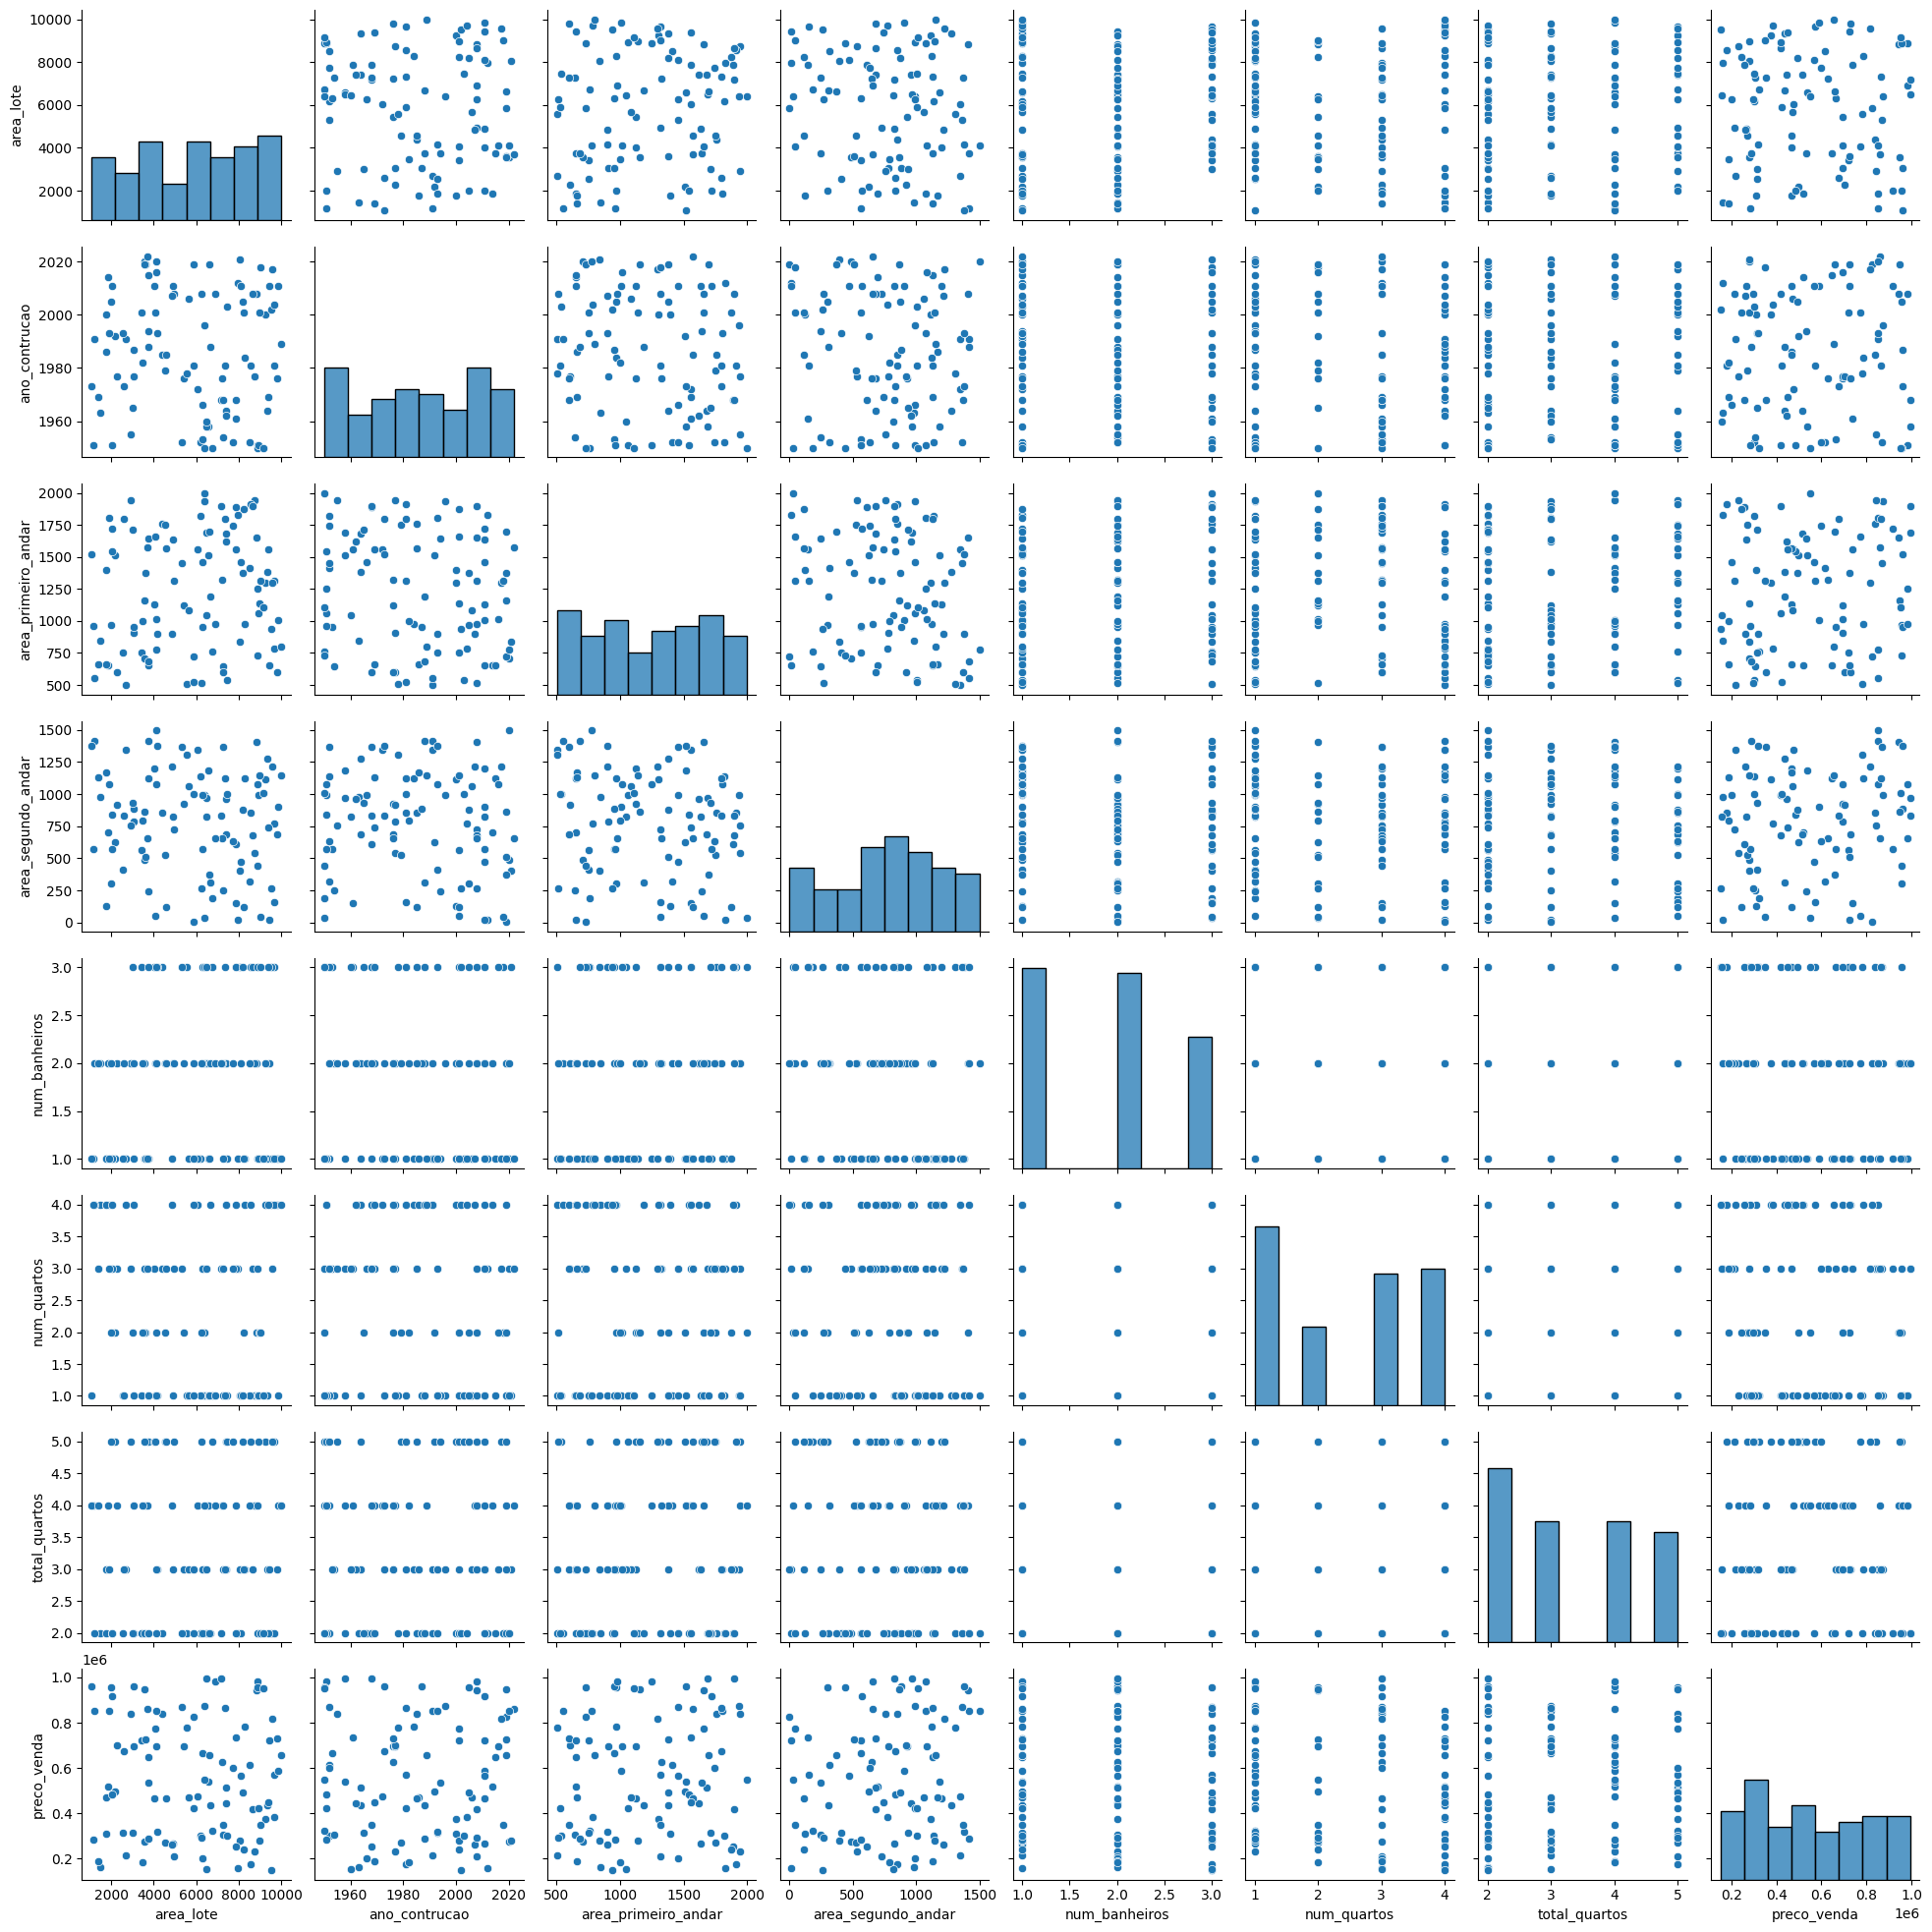

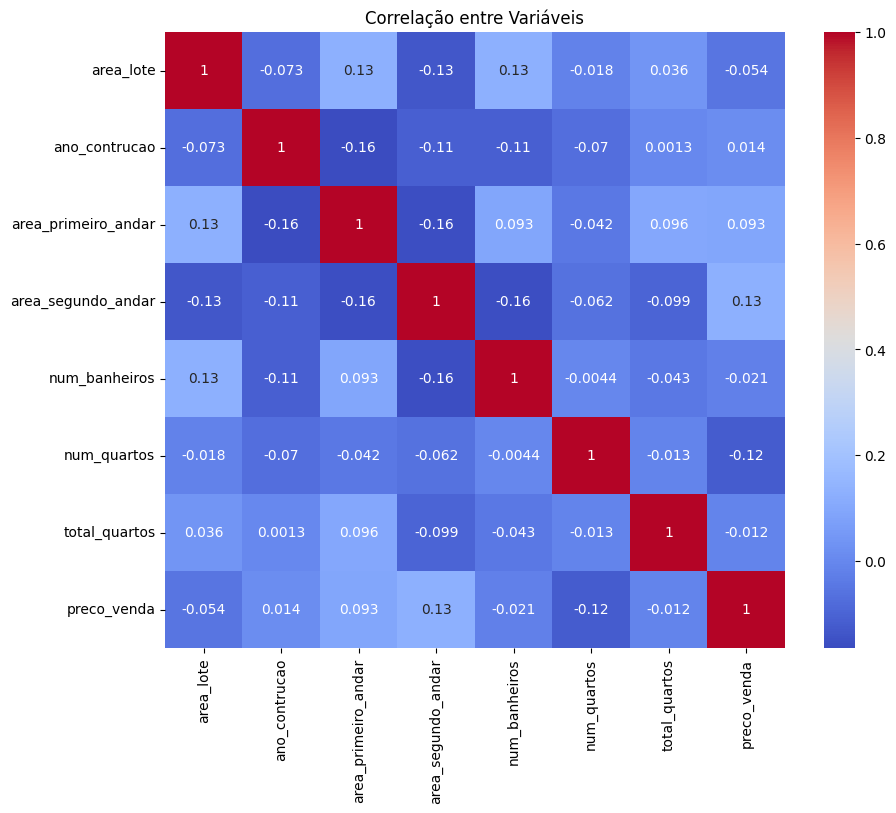

In [11]:
sns.pairplot(df)
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

Divisão do dataset em treino e teste:

In [12]:
x = df.drop('preco_venda', axis=1)
y = df['preco_venda']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Treinamento do modelo:

In [13]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

Avaliação do modelo

In [14]:
y_pred = modelo.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 100679369955.98
Coeficiente de Determinação (R²): -0.10


Interpretação dos coeficientes:

In [16]:
coeficientes = pd.DataFrame(modelo.coef_, x.columns, columns=['Coeficiente'])
print(coeficientes)

                      Coeficiente
area_lote               -3.817380
ano_contrucao         -263.139628
area_primeiro_andar     23.865656
area_segundo_andar      35.873668
num_banheiros        -7357.278034
num_quartos         -38129.568155
total_quartos        -7711.191120


Visualização do resultado:

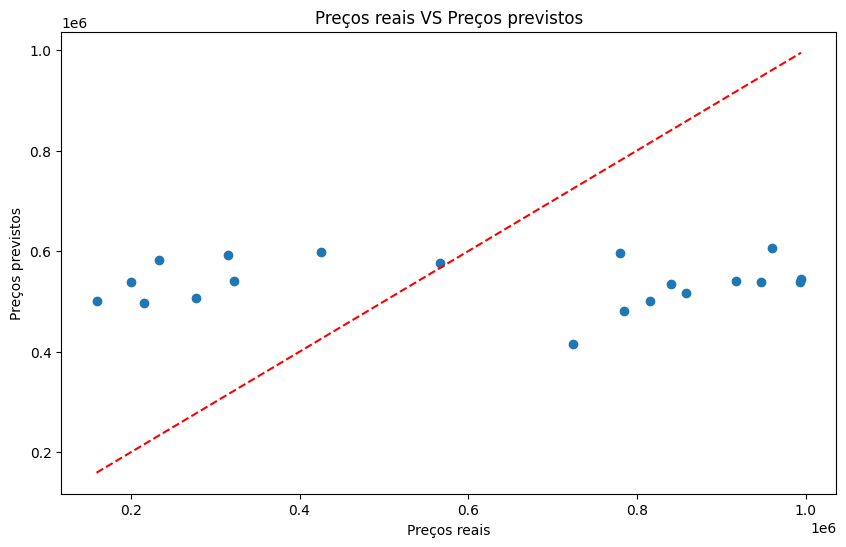

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Preços reais VS Preços previstos')
plt.xlabel('Preços reais')
plt.ylabel('Preços previstos')
plt.show()